# Assignment 01 - IND 320

03 october 2025

**Rochat Lise**

## AI usage

## Log describing

## Github and Streamlit app links

- Streamlit app: [https://liserochat-ind320-dashboard.streamlit.app
](https://liserochat-ind320-dashboard.streamlit.app)  
- GitHub repository: [https://github.com/lise-dev/liserochat-ind320-dashboard.git](https://github.com/lise-dev/liserochat-ind320-dashboard.git)

## CSV Analysis and plots

1. Read the supplied CSV file using Pandas.
2. Print its contents in a relevant way.
3. Plot each column separately.
4. Plot all columns together. Consider how to make this natural, given that the scales are different.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/open-meteo-subset.csv', encoding='latin-1', sep=',')

,time,temperature_2m (Â°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (Â°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


2. Print its contents in a relevant way

In [50]:
if 'time' in data.columns:
    data['time'] = pd.to_datetime(data['time'], errors='coerce', utc=True)
    data = data.sort_values('time').reset_index(drop=True)
    data = data.set_index('time')  
else:
    raise KeyError("The 'time' column is missing from the dataset.")

data.head()


,temperature_2m (Â°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (Â°)
time,,,,,
2020-01-01 00:00:00+00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00+00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00+00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00+00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00+00:00,-2.7,0.0,10.6,22.8,284


3. Plot each column separately


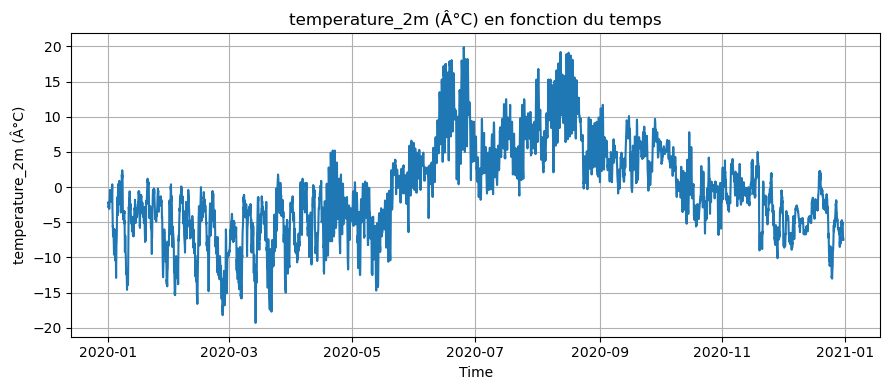

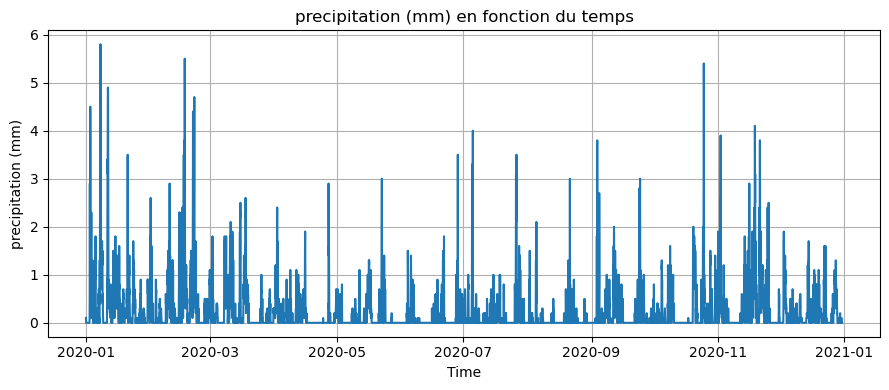

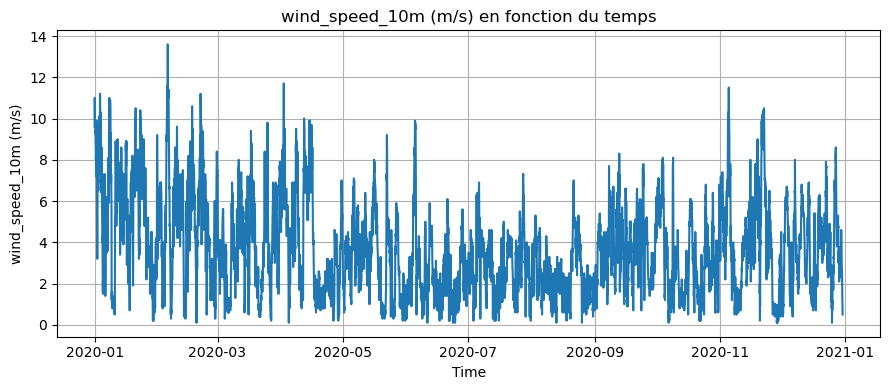

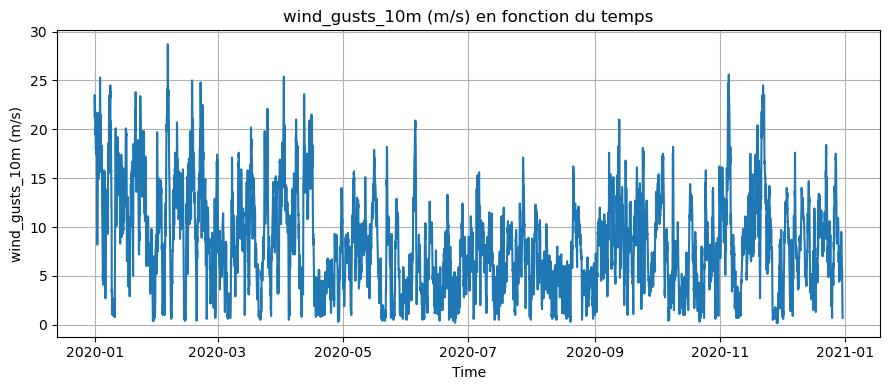

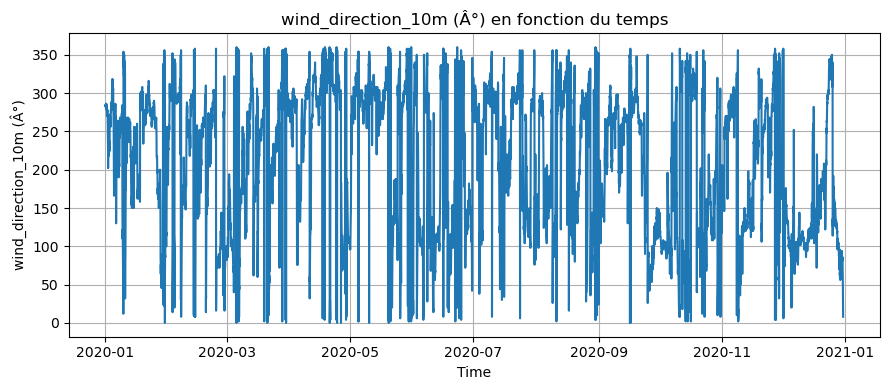

In [51]:
num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(9, 4))
    plt.plot(data.index, data[col])
    plt.title(f'{col} en fonction du temps')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



4. Plot all columns together

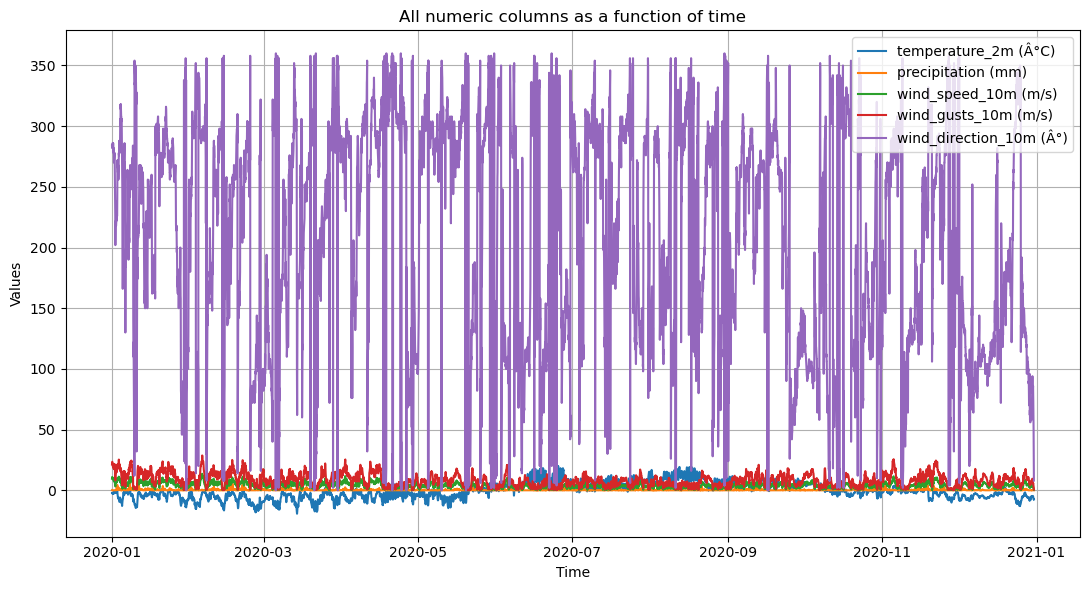

In [52]:
plt.figure(figsize=(11, 6))
for col in num_cols:
    plt.plot(data.index, data[col], label=col)
plt.title('All numeric columns as a function of time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()